In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Working with dataset: resizing images to 350x350 px.**
***Google drive link: https://drive.google.com/drive/folders/13MPMjliJgEsCS_UFG1l12_F1ieiSCXAU?usp=sharing***

In [ ]:
from PIL import Image
import os

# Path to the folder containing the images
folder_path = "/content/drive/MyDrive/FinalML/validation/fog validation"

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Loop through each file
for file in files:
    # Check if the file is an image
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
        # Open the image
        image_path = os.path.join(folder_path, file)
        img = Image.open(image_path)

        # Resize the image to 350x350 pixels
        img = img.resize((350, 350))

        # Save the resized image, overwriting the original file
        img.save(image_path)

print("All images resized to 350x350 pixels.")

All images resized to 350x350 pixels.


**TRAINING**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

dataset_dir = '/content/drive/MyDrive/FinalML'

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'train'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'validation'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Found 255 images belonging to 4 classes.
Found 216 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

IMG_SIZE = (350, 350, 3)

model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output layer
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 174, 174, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 86, 86, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 84, 84, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 42, 42, 128)      

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
                    verbose=1)

Epoch 1/10
8/8 [==============================] - 103s 13s/step - loss: 359.6372 - accuracy: 0.2667 - val_loss: 4.6693 - val_accuracy: 0.3426
Epoch 2/10
8/8 [==============================] - 117s 15s/step - loss: 1.2937 - accuracy: 0.5294 - val_loss: 1.6445 - val_accuracy: 0.4167
Epoch 3/10
8/8 [==============================] - 97s 12s/step - loss: 1.1310 - accuracy: 0.6275 - val_loss: 1.9263 - val_accuracy: 0.3796
Epoch 4/10
8/8 [==============================] - 95s 12s/step - loss: 0.8147 - accuracy: 0.6941 - val_loss: 1.5000 - val_accuracy: 0.3472
Epoch 5/10
8/8 [==============================] - 117s 15s/step - loss: 0.5650 - accuracy: 0.8353 - val_loss: 2.6205 - val_accuracy: 0.3519
Epoch 6/10
8/8 [==============================] - 118s 15s/step - loss: 0.4398 - accuracy: 0.8510 - val_loss: 2.1219 - val_accuracy: 0.4815
Epoch 7/10
8/8 [==============================] - 116s 15s/step - loss: 0.3828 - accuracy: 0.9176 - val_loss: 2.6686 - val_accuracy: 0.3750


**Validation loss and accuracy evaluation**

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

7/7 [==============================] - 23s 3s/step - loss: 2.6686 - accuracy: 0.3750
Validation Loss: 2.668630838394165
Validation Accuracy: 0.375


**Prediction on several images**

In [ ]:
labels = {0: 'fog', 1: 'rain', 2: 'snow', 3: 'sun'}

1/1 [==============================] - 0s 107ms/step


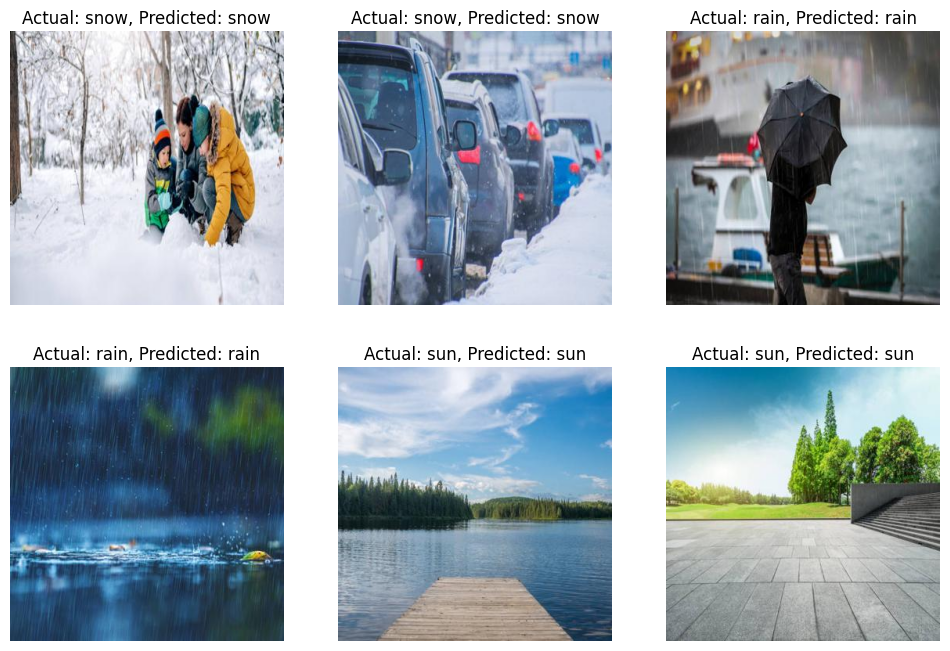

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


def predict_image_class(img_path):
    img = image.load_img(img_path, target_size=(350, 350))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class


def show_image_with_predictions(image_paths):
    plt.figure(figsize=(12, 8))
    num_images = min(len(image_paths), 6)
    for i, img_path in enumerate(image_paths[:num_images], 1):
        actual_class = img_path.split('/')[-2]
        predicted_class = predict_image_class(img_path)
        img = image.load_img(img_path, target_size=(350, 350))
        plt.subplot(2, 3, i)
        plt.imshow(img)
        plt.title(f'Actual: {actual_class.replace(" train", "")}, Predicted: {labels[predicted_class]}')
        plt.axis('off')
    plt.show()


folder_paths = ['/content/drive/MyDrive/FinalML/train/snow train',
                '/content/drive/MyDrive/FinalML/train/rain train',
                '/content/drive/MyDrive/FinalML/train/sun train',
                '/content/drive/MyDrive/FinalML/train/fog train',
]


image_paths = []
for folder_path in folder_paths:
    folder_images = os.listdir(folder_path)
    random.shuffle(folder_images)
    for img_name in folder_images[:2]:
        image_paths.append(os.path.join(folder_path, img_name))

show_image_with_predictions(image_paths)

1/1 [==============================] - 3s 3s/step


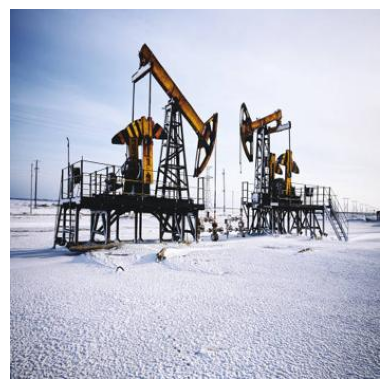

Predicted: snow
True: snow



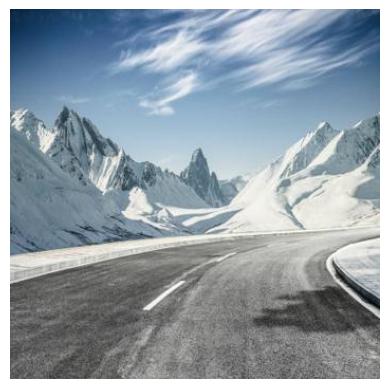

Predicted: snow
True: snow



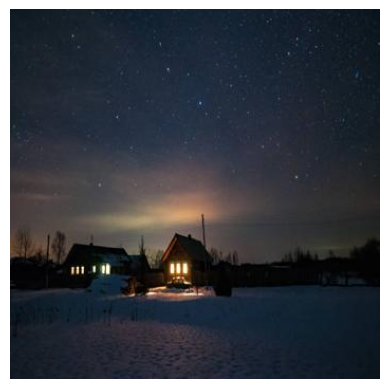

Predicted: rain
True: snow



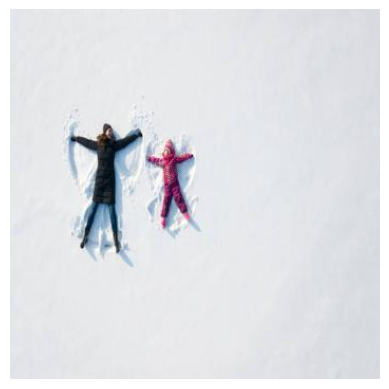

Predicted: snow
True: snow



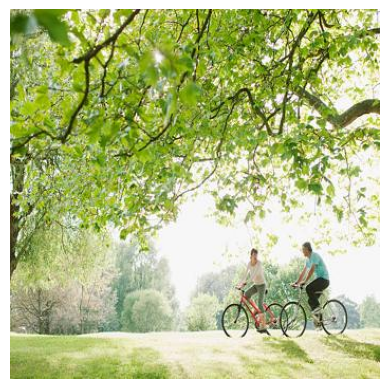

Predicted: sun
True: sun



In [ ]:
import numpy as np

val_images, val_labels = next(val_generator)
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(train_generator.class_indices.keys())
class_labels = [label.split(' ')[0] for label in class_labels]

for i in range(min(5, len(val_images))):

    plt.imshow(val_images[i])
    plt.axis('off')
    plt.show()

    predicted_label = class_labels[predicted_classes[i]]
    true_label = class_labels[int(val_labels[i])]

    print("Predicted:", predicted_label)
    print("True:", true_label)
    print()

**Adding data augmentation**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'train'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'validation'),
    target_size=(350, 350),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 255 images belonging to 4 classes.
Found 216 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)],
                    verbose=1)

Epoch 1/10
8/8 [==============================] - 108s 13s/step - loss: 1.3564 - accuracy: 0.3569 - val_loss: 1.3191 - val_accuracy: 0.3519
Epoch 2/10
8/8 [==============================] - 102s 13s/step - loss: 1.2725 - accuracy: 0.4196 - val_loss: 1.3367 - val_accuracy: 0.2731
Epoch 3/10
8/8 [==============================] - 101s 13s/step - loss: 1.1491 - accuracy: 0.4980 - val_loss: 1.1505 - val_accuracy: 0.4491
Epoch 4/10
8/8 [==============================] - 101s 13s/step - loss: 1.0507 - accuracy: 0.5451 - val_loss: 1.1037 - val_accuracy: 0.4676
Epoch 5/10
8/8 [==============================] - 102s 13s/step - loss: 0.9561 - accuracy: 0.5451 - val_loss: 1.1027 - val_accuracy: 0.5463
Epoch 6/10
8/8 [==============================] - 134s 17s/step - loss: 0.8535 - accuracy: 0.6588 - val_loss: 1.1178 - val_accuracy: 0.5926
Epoch 7/10
8/8 [==============================] - 121s 15s/step - loss: 0.8534 - accuracy: 0.6549 - val_loss: 1.0478 - val_accuracy: 0.5648
Epoch 8/10
8/8 [====

**Plot accuracy and loss as functions of epochs**

Epoch 1/10
8/8 [==============================] - 112s 14s/step - loss: 0.7308 - accuracy: 0.7137 - val_loss: 1.0324 - val_accuracy: 0.6481
Epoch 2/10
8/8 [==============================] - 102s 13s/step - loss: 0.6544 - accuracy: 0.7451 - val_loss: 0.8596 - val_accuracy: 0.6991
Epoch 3/10
8/8 [==============================] - 109s 14s/step - loss: 0.7411 - accuracy: 0.7098 - val_loss: 1.2187 - val_accuracy: 0.6111
Epoch 4/10
8/8 [==============================] - 102s 13s/step - loss: 0.7116 - accuracy: 0.7216 - val_loss: 0.9115 - val_accuracy: 0.6574
Epoch 5/10
8/8 [==============================] - 102s 13s/step - loss: 0.7287 - accuracy: 0.7020 - val_loss: 0.8292 - val_accuracy: 0.6944
Epoch 6/10
8/8 [==============================] - 101s 13s/step - loss: 0.6464 - accuracy: 0.7451 - val_loss: 0.8676 - val_accuracy: 0.6435
Epoch 7/10
8/8 [==============================] - 101s 13s/step - loss: 0.5940 - accuracy: 0.7686 - val_loss: 0.8360 - val_accuracy: 0.6852
Epoch 8/10
8/8 [====

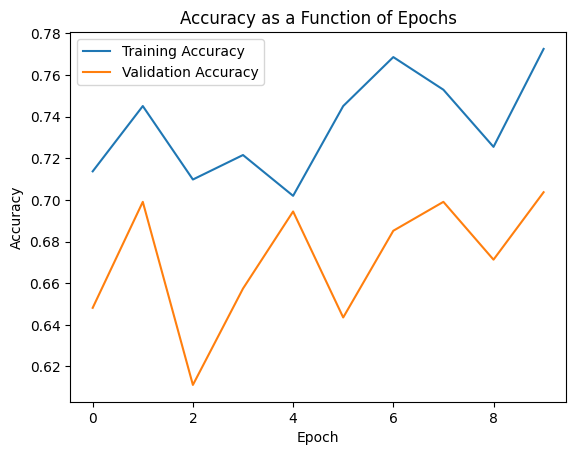

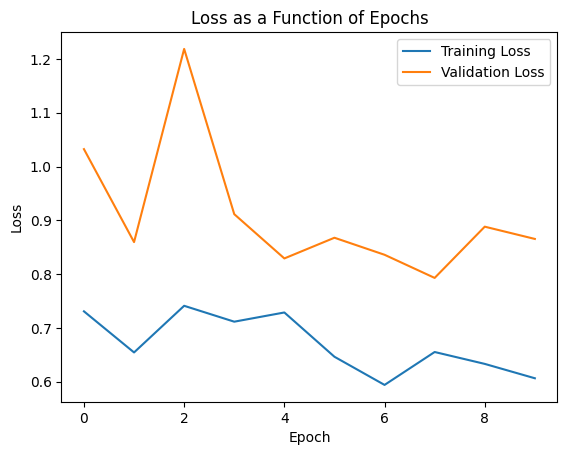

In [ ]:

import matplotlib.pyplot as plt

history = model.fit(train_generator, epochs=10, validation_data=val_generator)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy as a Function of Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss as a Function of Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 3s 3s/step


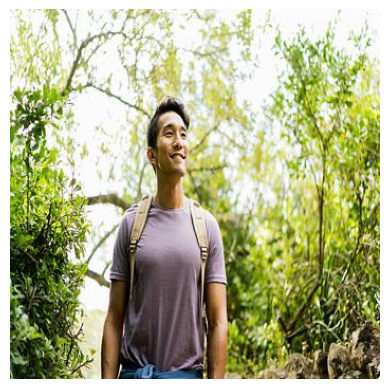

Predicted: sun
True: sun



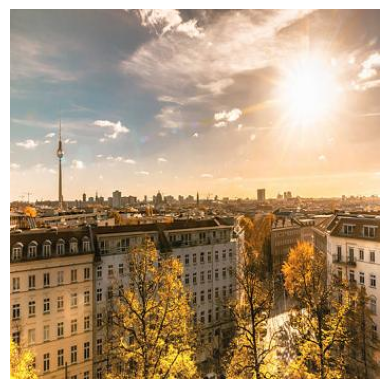

Predicted: rain
True: sun



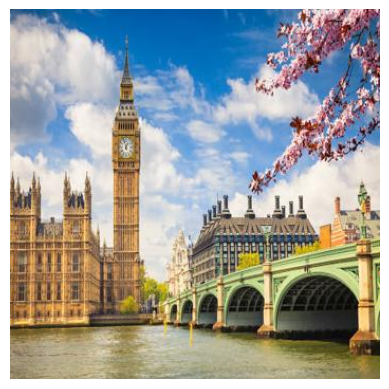

Predicted: sun
True: sun



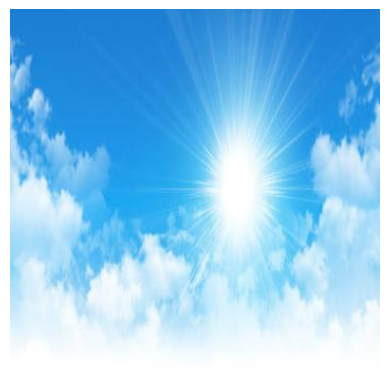

Predicted: sun
True: sun



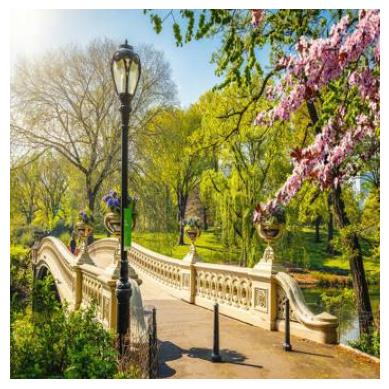

Predicted: sun
True: sun



In [ ]:
val_images, val_labels = next(val_generator)
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(train_generator.class_indices.keys())
class_labels = [label.split(' ')[0] for label in class_labels]

for i in range(min(5, len(val_images))):

    plt.imshow(val_images[i])
    plt.axis('off')
    plt.show()

    predicted_label = class_labels[predicted_classes[i]]
    true_label = class_labels[int(val_labels[i])]

    print("Predicted:", predicted_label)
    print("True:", true_label)
    print()

In [ ]:
model.save("/content/my_model.h5")

In [ ]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 22.1 MB/s eta 0:00:00


In [ ]:
!pwd

/content


In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    my_model.h5 \
    mynew_tfjs_model

2024-03-06 14:12:52.617449: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 14:12:52.617542: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 14:12:52.622486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 14:12:57.367079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!ls

drive  my_model.h5  mynew_tfjs_model  sample_data


In [ ]:
!ls /content/mynew_tfjs_model -lh

total 111M
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard10of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard11of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard12of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard13of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard14of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard15of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard16of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard17of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard18of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard19of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard1of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard20of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard21of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard22of28.bin
-rw-r--r-- 1 root root 4.0M Mar  6 14:13 group1-shard23of28.bin
-rw-r--r-- 1 root root 4.0M Ma

In [ ]:

# Get the path to your new model folder.
model_path = '/content/drive/MyDrive/mynew_tfjs_model'

# Copy the folder from the current directory to your Google Drive.
!cp -r /content/mynew_tfjs_model {model_path}

1/1 [==============================] - 0s 90ms/step


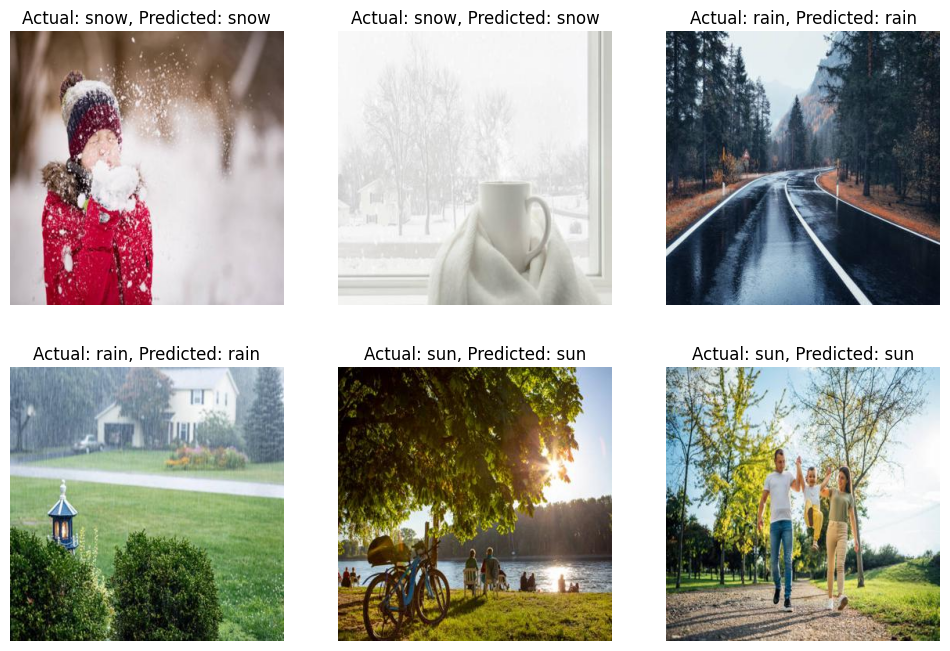

In [ ]:
def predict_image_class(img_path):
    img = image.load_img(img_path, target_size=(350, 350))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class


def show_image_with_predictions(image_paths):
    plt.figure(figsize=(12, 8))
    num_images = min(len(image_paths), 6)
    for i, img_path in enumerate(image_paths[:num_images], 1):
        actual_class = img_path.split('/')[-2]
        predicted_class = predict_image_class(img_path)
        img = image.load_img(img_path, target_size=(350, 350))
        plt.subplot(2, 3, i)
        plt.imshow(img)
        plt.title(f'Actual: {actual_class.replace(" train", "")}, Predicted: {labels[predicted_class]}')
        plt.axis('off')
    plt.show()


folder_paths = ['/content/drive/MyDrive/FinalML/train/snow train',
                '/content/drive/MyDrive/FinalML/train/rain train',
                '/content/drive/MyDrive/FinalML/train/sun train',
                '/content/drive/MyDrive/FinalML/train/fog train',
]


image_paths = []
for folder_path in folder_paths:
    folder_images = os.listdir(folder_path)
    random.shuffle(folder_images)
    for img_name in folder_images[:2]:
        image_paths.append(os.path.join(folder_path, img_name))

show_image_with_predictions(image_paths)